Assume you are a team of machine learning engineers working for an ecommerce furniture shop, where users can browse and navigate interior furniture items. You are required to build a Furniture Recommender that allows users who have recently moved to explore furniture on your ecommerce system at ease. Your systems should have a functionality to help users navigate to the category of the furniture item that users want to buy. In most of the current online shops, users should type the name of the items and browse from the list of the results. However, to enhance the quality of the searching results, our system provides an image based searching function, where the users can upload the images of the furniture item that they are looking for. The system will accomplish an image search and return the list of similar-styled furniture in favor from our dataset.
In the Furniture dataset, there are 06 categories: beds - 6578 images; chairs - 22053 images; dressers - 7871 images; lamps - 32402 images; sofas - 4080 images; tables - 17100 images, with total of 90084 images. For every category, there are 17 interior styles:
- (a) Asian; (b) Beach; (c) Contemp; (d) Craftsman; (e) Eclectic; (f) Farmhouse; 
- (g) Industrial; (h) Media; (i) Midcentury; (j) Modern; (k) Rustic; (l) Scandinavian; 
- (m) Southwestern; (n) Traditional; (o) Transitional; (p) Tropical and (q) Victorian

You have three tasks in this project:
- **Task 1:** Classify images according to furniture category (beds; chairs; dressers; lamps; sofas; tables)
- **Task 2:** Recommend 10 furniture items in our dataset which is similar to the input furniture item image from users. You are required to define a metric of “similarity” between two furniture items.
- **Task 3:** (only for those aim HD) The extension of the model in Task 2, the recommended furniture items must be in the same interior styles with the style of the input images. In order to fulfill this task, you are required to build a model to recognize the style of a furniture item.

In [1]:
from PIL import Image
import pandas as pd
import os
import hashlib
import shutil

In [2]:
tables_dataset_folder = "../Data/Raw/Furniture_Data/tables"

In [3]:
duplicates_dataset_folder = "../Data/Raw/Furniture_Data/duplicates"

In [12]:
desired_size = (256, 256)

tables_image_data = []
tables_image_hashes = set()
tables_image_color_hist = []

main_folder_name = os.path.basename(tables_dataset_folder)

In [13]:
for root, dirs, files in os.walk(tables_dataset_folder):
    for filename in files:
        if filename == ".DS_Store":
            continue
            
        file_path = os.path.join(root, filename)
        try:
            
            img = Image.open(file_path)
            resized_img = img.resize(desired_size)
            image_hash = hashlib.md5(resized_img.tobytes()).hexdigest()
                        
            # Ignore duplicates
            if image_hash not in tables_image_hashes:
                # Add new img to histogram list
                histogram = img.histogram()
                tables_image_color_hist.append(histogram)
                
                # Add new img to hash
                tables_image_hashes.add(image_hash)
                subfolder_name = os.path.basename(root)
                tables_image_data.append((main_folder_name, subfolder_name, resized_img))
                
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")

In [6]:
print(len(tables_image_data))
print(len(tables_image_hashes))

17100
17100


In [7]:
df = pd.DataFrame(tables_image_data, columns=['Cat', 'Style', 'Img'])
df

,Cat,Style,Img
0,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
1,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
2,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
3,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
4,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
...,...,...,...
17095,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...
17096,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...
17097,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...
17098,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...


#### Remove duplicates - ref link:
https://www.thedigitalpictureframe.com/remove-duplicate-photos-from-your-picture-folder-automatically-the-2023-update/

https://medium.com/@urvisoni/removing-duplicate-images-through-python-23c5fdc7479e

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

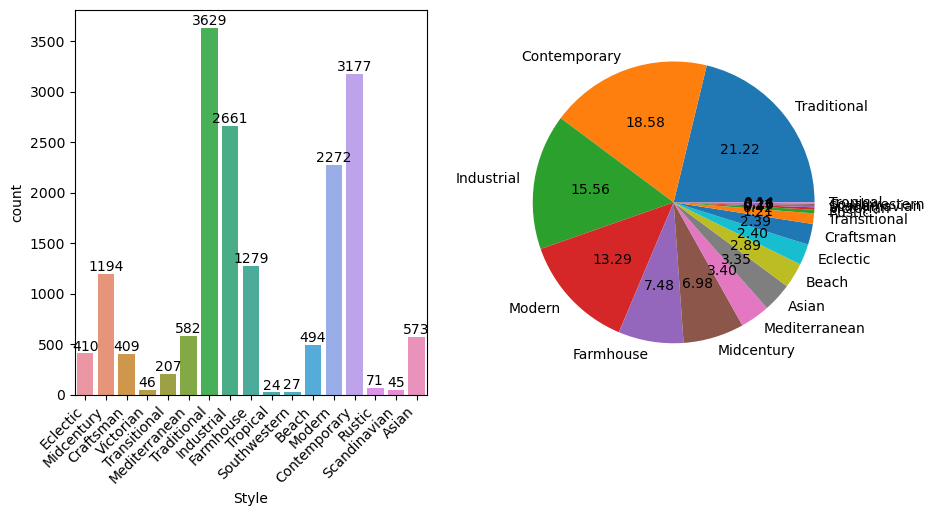

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.countplot(data=df, x='Style', ax=ax[0])
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    ha="right"
)
for c in ax1.containers:
    ax1.bar_label(c)
    
ax2 = plt.subplot(1, 2, 2)
styles_count = df['Style'].value_counts()
ax2.pie(styles_count, labels=styles_count.index, autopct='%.2f')

plt.show()

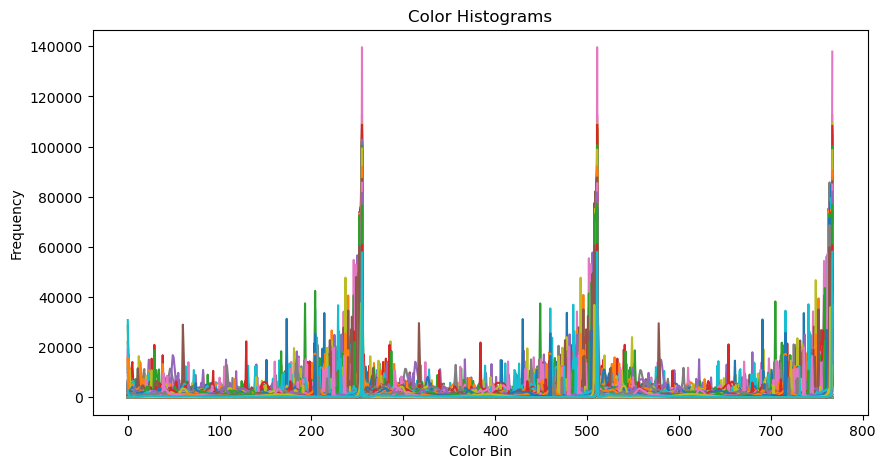

In [22]:
# Plot color histograms
color_histograms = np.array(tables_image_color_hist)
plt.figure(figsize=(10, 5))
plt.plot(color_histograms.T)
plt.xlabel('Color Bin')
plt.ylabel('Frequency')
plt.title('Color Histograms')
plt.show()